# Keeping an Eye on Healthcare Costs: The D2Hawkeye Story

<img src="images/D2Hawkeye.jpg"/>

We unfortunately can't use the D2Hawkeye data due to privacy issues. The data set we'll be using instead, *ClaimsData.csv*, is structured to represent a sample of patients in the Medicare program, which provides health insurance to Americans aged 65 and older, as well as some younger people with certain medical conditions.

### Load and Exploration the Data

In [1]:
Claims = read.csv("data/ClaimsData.csv")
head(Claims)

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heart.failure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,85,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,59,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,67,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,52,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
5,67,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
6,68,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [2]:
str(Claims)

'data.frame':	458005 obs. of  16 variables:
 $ age              : int  85 59 67 52 67 68 75 70 67 67 ...
 $ alzheimers       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ arthritis        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ cancer           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ copd             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ depression       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ diabetes         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ heart.failure    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ihd              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ kidney           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ osteoporosis     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ stroke           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ reimbursement2008: int  0 0 0 0 0 0 0 0 0 0 ...
 $ bucket2008       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ reimbursement2009: int  0 0 0 0 0 0 0 0 0 0 ...
 $ bucket2009       : int  1 1 1 1 1 1 1 1 1 1 ...


In [3]:
summary(Claims)

      age           alzheimers       arthritis          cancer       
 Min.   : 26.00   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.: 67.00   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000  
 Median : 73.00   Median :0.0000   Median :0.0000   Median :0.00000  
 Mean   : 72.63   Mean   :0.1922   Mean   :0.1543   Mean   :0.06411  
 3rd Qu.: 81.00   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.00000  
 Max.   :100.00   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  
      copd          depression        diabetes      heart.failure   
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.1361   Mean   :0.2131   Mean   :0.3805   Mean   :0.2847  
 3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
      ihd             kidne

### Percentage of patients in each cost bucket

The first cost bucket contains patients with costs less than \\$3,000, the second cost bucket contains patients with costs between \\$3,000 and \\$8,000, and so on.

We can verify that the number of patients in each cost bucket has the same structure as what we saw for D2Hawkeye by computing the percentage of patients in each cost bucket. So we'll create a table of the variable bucket2009 and divide by the number of rows in Claims. This gives the percentage of patients in each of the cost buckets.

In [4]:
table(Claims$bucket2009)/nrow(Claims)


          1           2           3           4           5 
0.671267781 0.190170413 0.089466272 0.043324855 0.005770679 

The first cost bucket has almost 70% of the patients. The second cost bucket has about 20% of the patients. And the remaining 10% are split between the final three cost buckets.

Our goal will be to predict the cost bucket the patient fell into in 2009 using a CART model. But before we build our model, we
need to split our data into a training set and a testing set.

### Split the data

In [5]:
library(caTools)

In [6]:
set.seed(88)

spl = sample.split(Claims$bucket2009, SplitRatio = 0.6)  # 60% in training set

ClaimsTrain = subset(Claims, spl==TRUE)
ClaimsTest = subset(Claims, spl==FALSE)

### Baseline Method

The baseline method would predict that the cost bucket for a patient in 2009 will be the same as it was in 2008. So let's create a classification matrix to compute the accuracy for the baseline method on the test set.

We'll use the table function, where the actual outcomes are ClaimsTest\\$bucket2009, and our predictions are ClaimsTest\\$bucket2008.

In [13]:
z = table(ClaimsTest$bucket2009, ClaimsTest$bucket2008)
z

   
         1      2      3      4      5
  1 110138   7787   3427   1452    174
  2  16000  10721   4629   2931    559
  3   7006   4629   2774   1621    360
  4   2688   1943   1415   1539    352
  5    293    191    160    309    104

    z[1]  z[6]  z[11]  z[16]  z[21]
    z[2]  z[7]  z[12]  z[17]  z[22]
    z[3]  z[8]  z[13]  z[18]  z[23]
    z[4]  z[9]  z[14]  z[19]  z[24]
    z[5]  z[10] z[15]  z[20]  z[25]

The accuracy is the sum of the diagonal, the observations that were classified correctly, divided by the total number of observations in our test set.

In [14]:
(z[1] + z[7] + z[13] + z[19] + z[25])/nrow(ClaimsTest) #  Or sum(diag(z))/nrow(ClaimTest)

[1] 0.6838135

So the accuracy of the baseline method is 0.68.

### Penalty Matrix

    0, 1, 2, 3, 4. That'll be the first row.
    2, 0, 1, 2, 3. That'll be the second row.
    4, 2, 0, 1, 2. For the third row.
    6, 4, 2, 0, 1. For the fourth row.
    8, 6, 4, 2, 0. For the fifth row.

In [15]:
PenaltyMatrix = matrix(c(0,1,2,3,4,2,0,1,2,3,4,2,0,1,2,6,4,2,0,1,8,6,4,2,0), byrow=TRUE, nrow=5)
PenaltyMatrix

0,1,2,3,4
2,0,1,2,3
4,2,0,1,2
6,4,2,0,1
8,6,4,2,0


### Classification Matrix X Penalty Matrix

To compute the penalty error of the baseline method, we need to  multiply our classification matrix by the penalty matrix.

In [20]:
# we need to surround the entire table function by as.matrix to convert it to a matrix

M = as.matrix(table(ClaimsTest$bucket2009, ClaimsTest$bucket2008))*PenaltyMatrix  # Classification Matrix * Penalty Matrix 

M

   
        1     2     3     4     5
  1     0  7787  6854  4356   696
  2 32000     0  4629  5862  1677
  3 28024  9258     0  1621   720
  4 16128  7772  2830     0   352
  5  2344  1146   640   618     0

It takes each number in the classification matrix and multiplies it by the corresponding number in the penalty matrix.

### Penaty Error

By definition is the sum of elements of M divide by number of rows in ClaimsTest.

In [21]:
sum(M)/nrow(ClaimsTest)

[1] 0.7386055

The penalty error for the baseline method is 0.74.

### Predicting Healthcare Costs

Our goal will be to create a CART model that has an accuracy higher than 68% and a penalty error lower than 0.74.

In [22]:
# Necessary libraries
library(rpart)
library(rpart.plot)

### CART model

We'll use the rpart function to predict bucket2009. Note that even though we have a multi-class classification
problem here, we build our tree in the same way as a binary classification problem.

In [23]:
ClaimsTree = rpart(bucket2009 ~ age + alzheimers + arthritis + cancer + copd + depression + diabetes + 
                   heart.failure + ihd + kidney + osteoporosis + stroke + bucket2008 + reimbursement2008, 
                   data=ClaimsTrain, method="class", cp=0.00005)

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"


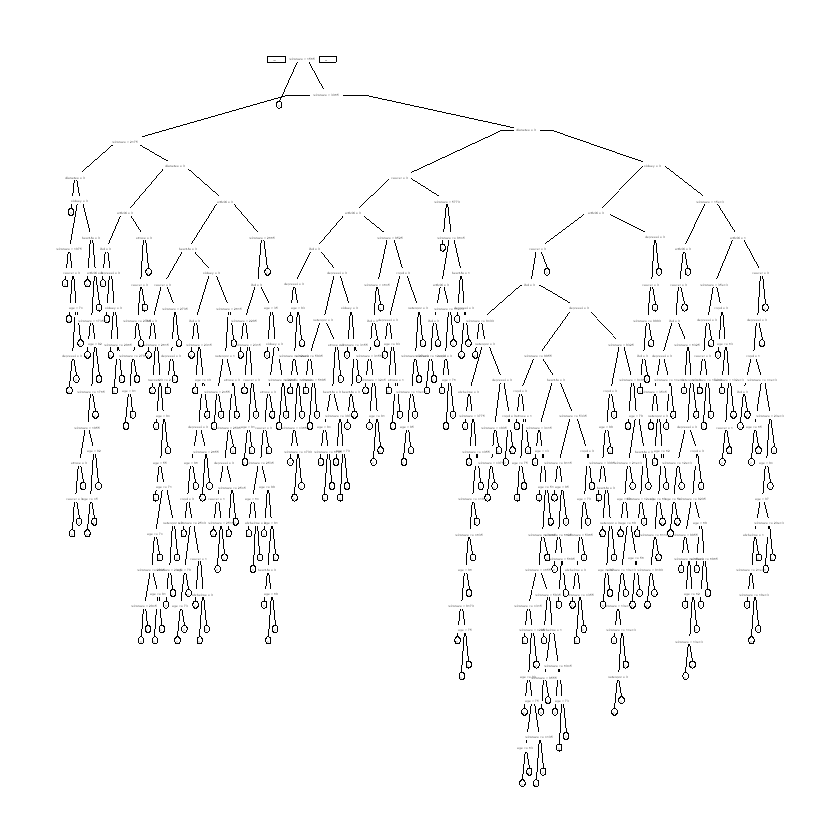

In [24]:
prp(ClaimsTree)

So now, let's make predictions on the test set.

### Make predictions

In [25]:
PredictTest = predict(ClaimsTree, newdata = ClaimsTest, type = "class")

we can make our classification matrix on the test set to compute the accuracy.

In [26]:
p = table(ClaimsTest$bucket2009, PredictTest)
p

   PredictTest
         1      2      3      4      5
  1 114141   8610    124    103      0
  2  18409  16102    187    142      0
  3   8027   8146    118     99      0
  4   3099   4584     53    201      0
  5    351    657      4     45      0

The accuracy is the sum of the diagonal, the observations that were classified correctly, divided by the total number of observations in our test set.

In [36]:
sum(diag(p))/nrow(ClaimsTest)

[1] 0.7126669

### Penalty Error

In [28]:
# Classification Matrix X Penalty Matrix
as.matrix(table(ClaimsTest$bucket2009, PredictTest))*PenaltyMatrix

   PredictTest
        1     2     3     4     5
  1     0  8610   248   309     0
  2 36818     0   187   284     0
  3 32108 16292     0    99     0
  4 18594 18336   106     0     0
  5  2808  3942    16    90     0

In [29]:
# Penalty Error = sum(Classification Matrix X Penalty Matrix)/nrow(observations in our test set)
sum(as.matrix(table(ClaimsTest$bucket2009, PredictTest))*PenaltyMatrix)/nrow(ClaimsTest)

[1] 0.7578902

So while we increased the accuracy, the penalty error also went up. The rpart function allows us to specify a parameter called loss. This is the penalty matrix we want to use when building our model.

### New CART model with loss matrix

In [30]:
ClaimsTree = rpart(bucket2009 ~ age + alzheimers + arthritis + cancer + copd + depression + diabetes + heart.failure + 
                   ihd + kidney + osteoporosis + stroke + bucket2008 + reimbursement2008, 
                   data=ClaimsTrain, method="class", cp=0.00005, parms=list(loss=PenaltyMatrix))

We'll probably get a lower overall accuracy with this new model. But hopefully, the penalty error will be much lower too.

### Redo predictions and penalty error

In [31]:
PredictTest = predict(ClaimsTree, newdata = ClaimsTest, type = "class")

Recreating our classification matrix:

In [38]:
t = table(ClaimsTest$bucket2009, PredictTest)

In [39]:
sum(diag(t))/nrow(ClaimsTest)

[1] 0.6472746

So the accuracy of this model is 0.647.

In [40]:
sum(as.matrix(table(ClaimsTest$bucket2009, PredictTest))*PenaltyMatrix)/nrow(ClaimsTest)

[1] 0.6418161

The penalty error of our new model is 0.642.

Our accuracy is now lower than the baseline method, but our penalty error is also much lower.

<img src="images/results.jpg"/>